<a href="https://colab.research.google.com/github/SDP1122/StockPredictor/blob/main/StockPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Predict stock price (Apple) using LSTM. Use past 60 days price as input features to predict the price on the 61st day

In [ ]:
!pip install --upgrade pandas-datareader 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [63]:
#read AAPL data from yahoo finance
#df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-07-31')

In [67]:
#show first few data points
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.557466
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.624951
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.765114
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.898557
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.878098


In [68]:
#get rows & cols
df.shape

(2661, 6)

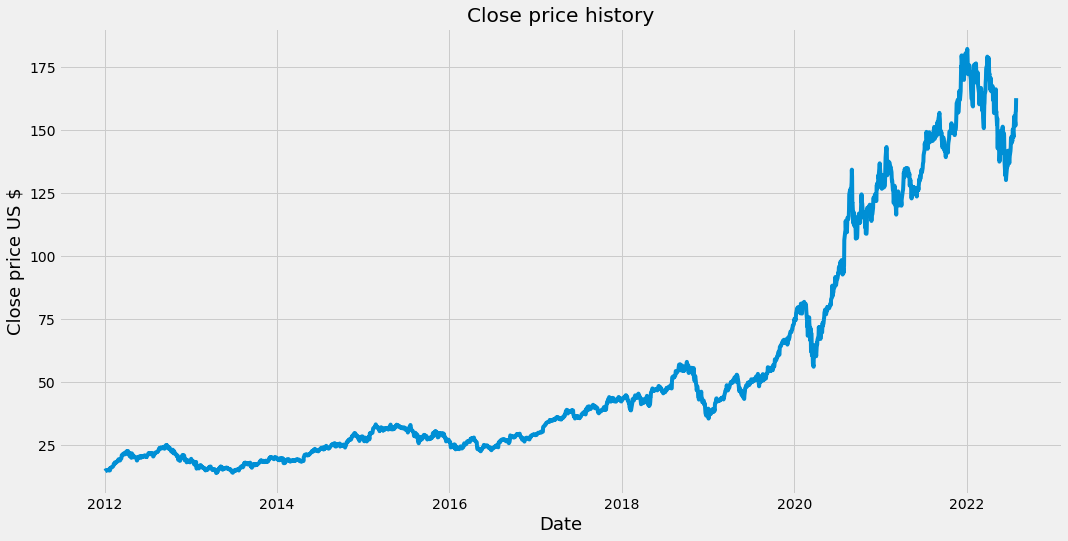

In [64]:
#visualize closing price history
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price US $', fontsize=18)
plt.show()

In [69]:
#create new df with just the Close price
data = df.filter(['Close'])

#convert df to a np array
dataset = data.values

#no of training data rows (80% of the full data)
training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2129

In [70]:
#transform the data to zero mean, unit std
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00439887],
       [0.00486851],
       [0.00584391],
       ...,
       [0.84993677],
       [0.85326894],
       [0.88397173]])

In [71]:
#Create trainign data set using scaled data
train_data = scaled_data[0:training_data_len,:]

#split data into x_train & y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])
  # if i<=61:
  #  print(x_train)
  #  print(y_train)
  #  print()





In [72]:
#conver x_train and y_train to np arrays
x_train, y_train = np.array(x_train), np.array(y_train)



In [73]:
#Reshape x_train and y_train to 3D arrays to fit LSTM input condition (samples, time steps, features)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(2069, 60, 1)

In [74]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))


In [75]:
#Compile model
model.compile(optimizer='adam',loss='mean_squared_error')

In [91]:
#Train model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
2069/2069 [==============================] - 62s 30ms/step - loss: 7.8437e-05
Epoch 2/10
2069/2069 [==============================] - 59s 29ms/step - loss: 6.5567e-05
Epoch 3/10
2069/2069 [==============================] - 59s 29ms/step - loss: 5.7406e-05
Epoch 4/10
2069/2069 [==============================] - 58s 28ms/step - loss: 5.6766e-05
Epoch 5/10
2069/2069 [==============================] - 58s 28ms/step - loss: 5.3756e-05
Epoch 6/10
2069/2069 [==============================] - 59s 28ms/step - loss: 5.0979e-05
Epoch 7/10
2069/2069 [==============================] - 59s 28ms/step - loss: 5.2162e-05
Epoch 8/10
2069/2069 [==============================] - 59s 28ms/step - loss: 4.7385e-05
Epoch 9/10
2069/2069 [==============================] - 59s 28ms/step - loss: 5.5127e-05
Epoch 10/10
2069/2069 [==============================] - 59s 28ms/step - loss: 4.9782e-05


In [92]:
#Create testing data set
#Create new array containing scaled values from index 1543 to 2003 / 2069 to 2129

test_data = scaled_data[training_data_len - 60 :, :]

#Create data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :] #target values from origianl (unscaled data)
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])



In [93]:
#Convert data to numpy array
x_test = np.array(x_test)


In [94]:
#Reshape x_test to fit LSTM model reuqirement
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [95]:
#Get model predicted price values
predictions = model.predict(x_test)

#Unscale the predicted prices to original scale
predictions = scaler.inverse_transform(predictions)

In [96]:
#Evaluate model performance 

#Get the RMSE value 
rmse = np.sqrt( np.mean((predictions - y_test)**2))
rmse

5.300693650969598

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


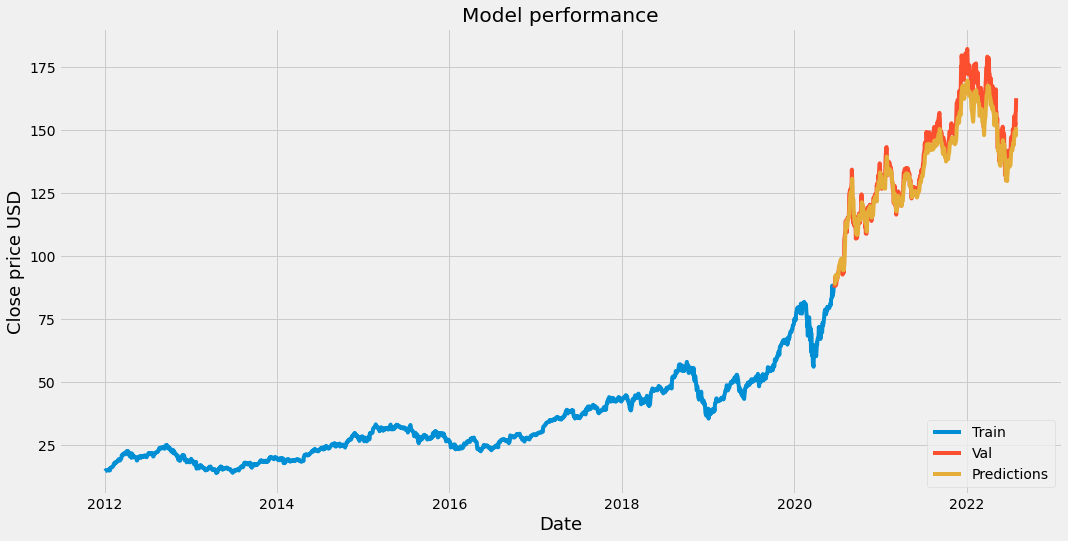

In [97]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#visualize data
plt.figure(figsize=(16,8))
plt.title('Model performance')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [99]:
#Show the valid (actual) and predicted prices
valid

,Close,Predictions
Date,,
2020-06-19,87.430000,89.249649
2020-06-22,89.717499,88.966003
2020-06-23,91.632500,90.570465
2020-06-24,90.014999,92.281158
2020-06-25,91.209999,91.546638
...,...,...
2022-07-25,152.949997,149.014694
2022-07-26,151.600006,148.459366
2022-07-27,156.789993,147.609390


In [103]:
#Predict the stock closing price on the 1 Aug 2022

#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2022-07-31')

#create a new df
new_df = apple_quote.filter(['Close'])

#get last 60 days of close price values and convert to arrray
last_60_days = new_df[-60:].values

#Scale the data between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#create empty list
X_test = []

#Append past 60 days 
X_test.append(last_60_days_scaled)

#Convert X_test to np array
X_test = np.array(X_test)

#Reshape to 3D array for input to LSTM 
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get predicted price
pred_price = model.predict(X_test)

#Undo scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price) #Predicted price on 1 Aug 2022

[[154.02107]]


In [105]:
#Compare predicted price against actual AAPL stock price on 1 Aug 2022
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2022-08-01', end='2022-08-01')
print(apple_quote2['Close'])

Date
2022-08-01    161.509995
Name: Close, dtype: float64
